In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import sys

sys.path.append('../')
import sfr_methods

In [3]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [5]:
sample_paths = np.load('../Selecting_Sample/final_sample_paths.npy', allow_pickle=True)

In [5]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [6]:
def calculate_stdv(series):
    mean = series.mean()
    
    summ = 0
    for element in series:
        summ = summ + (element - mean)**2
    
    return np.sqrt(summ / len(series))

In [7]:
dict_list = []
df_list = []

for path in sample_paths:
    filename = path.split('/')[-1].split('.')[0]
    
    galdict = load_dict('../Form_Resources/Dicts_Total_SFR_Thresholds/' + filename + '.dict.pkl')
    galdf = pd.read_pickle('../Form_Resources/DFs/' + filename + '.df.pkl')
    
    dict_list.append(galdict)
    df_list.append(galdf)

In [8]:
main_df = pd.DataFrame(dict_list)

In [9]:
main_df

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,...,"tot_nonspiral_sfr (7, 6)","sig_tot_nonspiral_sfr (7, 6)","tot_combined_sfr (7, 6)","sig_tot_combined_sfr (7, 6)","tot_spiral_sfr (7, 7)","sig_tot_spiral_sfr (7, 7)","tot_nonspiral_sfr (7, 7)","sig_tot_nonspiral_sfr (7, 7)","tot_combined_sfr (7, 7)","sig_tot_combined_sfr (7, 7)"
0,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-10166_91_14709872.fits.gz,1-10166,0.080584,345.119108,345119.107585,1.064926e+25,9.966806e+08,0.699887,"(62, 62)",...,13.370974,1.328022,14.926296,1.457799,1.557410,0.263033,13.370974,1.328022,14.926296,1.457799
1,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-90807_127_14714926.fits.gz,1-90807,0.066892,286.482529,286482.529415,8.839927e+24,6.867747e+08,0.482265,"(74, 74)",...,0.436202,0.280700,0.438981,0.278789,0.004522,0.007761,0.457275,0.285641,0.460119,0.283869
2,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-1038_61_14709525.fits.gz,1-1038,0.033373,142.926770,142926.769571,4.410259e+24,1.709406e+08,0.120037,"(52, 52)",...,0.297126,0.050793,0.297824,0.050882,0.000761,0.000662,0.298932,0.050865,0.299630,0.050954
3,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-91344_127_14714967.fits.gz,1-91344,0.046288,198.241617,198241.617327,6.117097e+24,3.288574e+08,0.230929,"(72, 72)",...,1.157917,0.221876,1.174909,0.224182,0.017343,0.007274,1.157917,0.221876,1.174909,0.224182
4,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-91394_91_14714976.fits.gz,1-91394,0.068683,294.151220,294151.220490,9.076558e+24,7.240346e+08,0.508430,"(62, 62)",...,11.263183,0.814935,11.263183,0.814935,0.000000,0.000000,11.263183,0.814935,11.263183,0.814935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-95220_127_14715251.fits.gz,1-95220,0.052835,226.279330,226279.330079,6.982251e+24,4.284575e+08,0.300870,"(72, 72)",...,1.797522,0.246341,1.902483,0.251611,0.105248,0.023224,1.973770,0.262430,2.078341,0.267195
831,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-95843_61_14715265.fits.gz,1-95843,0.035577,152.369089,152369.088504,4.701619e+24,1.942727e+08,0.136422,"(54, 54)",...,1.309811,0.152393,1.631236,0.168384,0.322626,0.042406,1.334814,0.153719,1.656307,0.169663
832,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-96448_91_14715290.fits.gz,1-96448,0.027326,117.028697,117028.697005,3.611128e+24,1.146048e+08,0.080478,"(62, 62)",...,1.388994,0.094794,1.539728,0.103625,0.157169,0.022116,1.417350,0.096181,1.574327,0.105084
833,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-96451_91_14715291.fits.gz,1-96451,0.027041,115.808914,115808.914300,3.573490e+24,1.122282e+08,0.078809,"(62, 62)",...,1.438129,0.109178,1.438129,0.109178,0.000000,0.000000,1.573097,0.114228,1.573097,0.114228


In [10]:
main_df['pc_tot_spiral_sfr'] = 100 * main_df['tot_spiral_sfr (3, 3)'] / main_df['tot_combined_sfr (3, 3)']
main_df['sig_pc_tot_spiral_sfr'] = main_df['pc_tot_spiral_sfr'] * np.sqrt((main_df['sig_tot_spiral_sfr (3, 3)']/main_df['tot_spiral_sfr (3, 3)'])**2 +
                                                                          (main_df['sig_tot_combined_sfr (3, 3)']/main_df['tot_combined_sfr (3, 3)'])**2)

In [11]:
filtered_df = main_df[main_df['pc_tot_spiral_sfr'] <= 100]

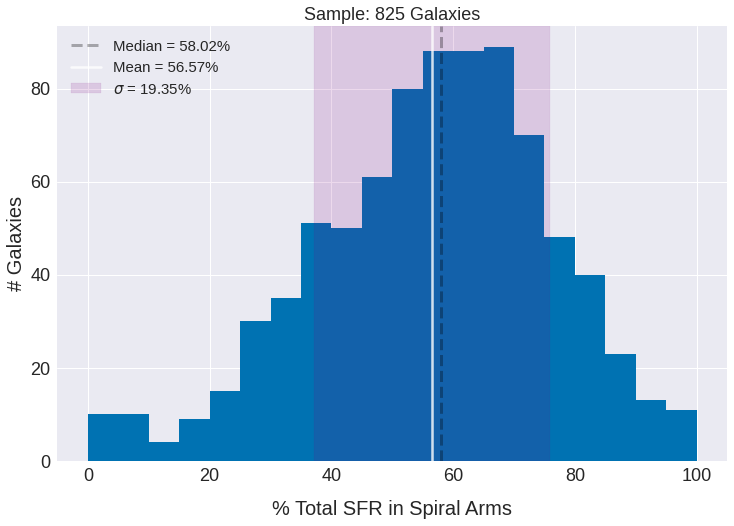

In [12]:
series = filtered_df['pc_tot_spiral_sfr']

plt.figure(figsize=(12, 8))

plt.hist(series, bins=20)

plt.xlabel('% Total SFR in Spiral Arms', size=20, labelpad=15)
plt.ylabel('# Galaxies', size=20)

plt.xticks(size=18)
plt.yticks(size=18)

mean_series = series.mean()
median_series = series.median()
stdv_series = calculate_stdv(series)

plt.axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
            label='Median = {:.4}%'.format(median_series))
plt.axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
            label='Mean = {:.4}%'.format(mean_series))

plt.axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
            label='$\sigma$ = {:.4}%'.format(stdv_series))

plt.title('Sample: {} Galaxies'.format(len(series)), size=18)
plt.legend(fontsize=15)

### Memory usage by the DFs combined (not including the list they are in):

In [16]:
tot_mem = 0

for df in df_list:
    tot_mem += df.memory_usage(deep=True).sum()

In [17]:
tot_mem #in bytes

995668552

In [18]:
tot_mem / 1024**2 #memory usage in MBs. Not bad?

949.5435256958008

### Now for the % spiral spaxels vs % SFR in spirals plot

In [20]:
n_spiral_spax = []
n_nspiral_spax = []

for i in range(len(df_list)):
    filename = dict_list[i]['filename'].split('.')[0]
    df = pd.read_pickle('../Form_Resources/DFs/' + filename + '.df.pkl')
    
    galdf = df.copy()
    
    galdf = galdf.dropna()
    galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
    galdf = galdf[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
    
    n_spiral = len(galdf[(galdf['Spiral Arm (3, 3)'] == True) & (galdf['Nonspiral Arm (3, 3)'] == False)])
    n_nspiral = len(galdf[galdf['Nonspiral Arm (3, 3)'] == True])
    
    n_spiral_spax.append(n_spiral)
    n_nspiral_spax.append(n_nspiral)

<ipython-input-20-ee83cf32664d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
<ipython-input-20-ee83cf32664d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
<ipython-input-20-ee83cf32664d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
<ipython-input-20-ee83cf32664d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
<ipython-input-20-ee83cf32664d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
<ipython-input-20-ee83cf32664d>:12: UserWarning: Boolea

In [21]:
main_df['Number of Spiral Spaxels'] = n_spiral_spax
main_df['Number of Nonspiral Spaxels'] = n_nspiral_spax

In [23]:
main_df['Total Counted Spaxels'] = main_df['Number of Spiral Spaxels'] + main_df['Number of Nonspiral Spaxels']

main_df['% Spiral Spaxels'] = 100 * main_df['Number of Spiral Spaxels'] / main_df['Total Counted Spaxels']

main_df['% Total SFR in Spirals/ % Spiral Spaxels'] = main_df['pc_tot_spiral_sfr'] / main_df['% Spiral Spaxels']

In [35]:
filtered_ratio_df = main_df[main_df['% Total SFR in Spirals/ % Spiral Spaxels'] < 6]

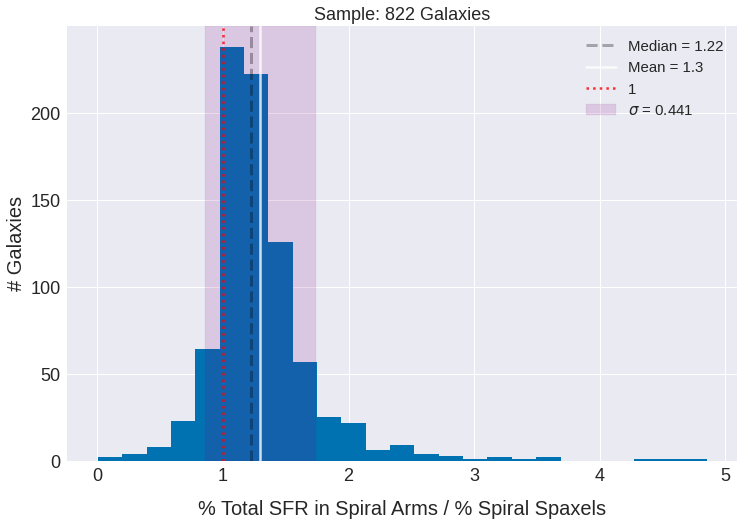

In [36]:
series = filtered_ratio_df['% Total SFR in Spirals/ % Spiral Spaxels']

plt.figure(figsize=(12, 8))

plt.hist(series, bins=25)

plt.xlabel('% Total SFR in Spiral Arms / % Spiral Spaxels', size=20, labelpad=15)
plt.ylabel('# Galaxies', size=20)

plt.xticks(size=18)
plt.yticks(size=18)

mean_series = series.mean()
median_series = series.median()
stdv_series = calculate_stdv(series)

plt.axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
            label='Median = {:.3}'.format(median_series))
plt.axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
            label='Mean = {:.3}'.format(mean_series))
plt.axvline(1, linestyle=':', linewidth=2.5, alpha=0.8, color='red',
            label='1')

plt.axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
            label='$\sigma$ = {:.3}'.format(stdv_series))

plt.title('Sample: {} Galaxies'.format(len(series)), size=18)
plt.legend(fontsize=15)

In [38]:
weird_gals = main_df[main_df['pc_tot_spiral_sfr'] > 100]

weird_gals

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,...,"sig_tot_nonspiral_sfr (7, 7)","tot_combined_sfr (7, 7)","sig_tot_combined_sfr (7, 7)",pc_tot_spiral_sfr,sig_pc_tot_spiral_sfr,Number of Spiral Spaxels,Number of Nonspiral Spaxels,Total Counted Spaxels,% Spiral Spaxels,% Total SFR in Spirals/ % Spiral Spaxels
35,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-135030_127_14716858.fits.gz,1-135030,0.027329,117.042830,117042.830078,3.611564e+24,1.146325e+08,0.080497,"(74, 74)",...,1.630304e-16,9.335178e-15,1.740468e-16,2.326513e+16,1.539071e+15,708,1047,1755,40.341880,5.766992e+14
36,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-135057_127_14716866.fits.gz,1-135057,0.028852,123.565029,123565.029139,3.812818e+24,1.277642e+08,0.089718,"(74, 74)",...,2.096330e-01,5.090953e-01,2.101167e-01,2.647016e+03,1.323067e+04,600,1756,2356,25.466893,1.039395e+02
60,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-146026_61_14717469.fits.gz,1-146026,0.022600,96.787995,96787.995065,2.986565e+24,7.839006e+07,0.055047,"(54, 54)",...,4.228636e-03,3.477512e-01,2.294328e-02,1.000481e+02,1.066047e+01,509,28,537,94.785847,1.055517e+00
240,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-247037_19_14721913.fits.gz,1-247037,0.037193,159.287870,159287.870159,4.915110e+24,2.123163e+08,0.149092,"(34, 34)",...,2.843944e-03,1.224195e-02,2.843944e-03,2.246087e+03,6.344293e+02,186,153,339,54.867257,4.093674e+01
298,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-266039_127_14722797.fits.gz,1-266039,0.035044,150.086811,150086.811348,4.631195e+24,1.884964e+08,0.132365,"(74, 74)",...,7.400237e-06,2.681442e-04,7.400237e-06,6.322317e+05,4.369302e+04,917,1652,2569,35.694823,1.771214e+04
300,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-268479_127_14722891.fits.gz,1-268479,0.044961,192.557981,192557.980598,5.941718e+24,3.102709e+08,0.217878,"(74, 74)",...,6.255233e-03,1.171490e-01,6.255233e-03,4.834313e+02,7.341126e+01,568,1757,2325,24.430108,1.978834e+01
349,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-285916_127_14723789.fits.gz,1-285916,0.132899,569.173113,569173.112511,1.756285e+25,2.710858e+09,1.903612,"(72, 72)",...,3.911572e-01,6.928317e-01,4.143845e-01,1.068660e+02,1.010557e+02,379,104,483,78.467909,1.361907e+00
633,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-55170_127_14712269.fits.gz,1-55170,0.147977,633.746866,633746.866174,1.955538e+25,3.360854e+09,2.360051,"(74, 74)",...,7.601861e-07,6.161745e-06,1.343108e-06,2.655877e+03,8.861309e+02,243,196,439,55.353075,4.798066e+01
721,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-606221_127_14742705.fits.gz,1-606221,0.024563,105.196437,105196.436879,3.246023e+24,9.260193e+07,0.065027,"(72, 72)",...,1.724773e-04,2.950655e-03,1.729968e-04,1.746477e+04,1.707020e+03,630,2046,2676,23.542601,7.418368e+02
